# Test fail kvantarvutamisele

Autor: Marko Raidlo

In [1]:
from qiskit import *

In [10]:
from qiskit.tools.visualization import plot_histogram

In [13]:
from qiskit import IBMQ

IBMQ.save_account('c6777d9c5c8df201bc6d75574b6cc46ac7a7a1a4fd142a851824be97582cef5d124c1c693521b9b204899ec5bf7d1b3931d34674958a10c4ecf636a5e07e8a10')

In [2]:
qr = QuantumRegister(3)
cr = ClassicalRegister(3)

circuit = QuantumCircuit(qr, cr)

In [4]:
circuit.h(qr[0])
circuit.cx(qr[0], qr[1])
circuit.x(qr[0])
circuit.x(qr[2])

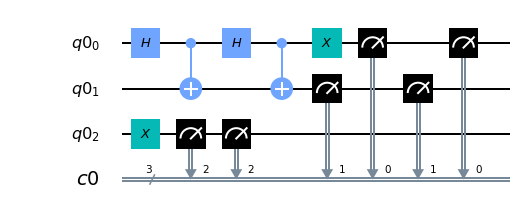

In [20]:
circuit.measure(qr, cr)
circuit.draw(output="mpl")

In [6]:
simulator = Aer.get_backend("qasm_simulator")

In [7]:
result = execute(circuit, backend = simulator).result()

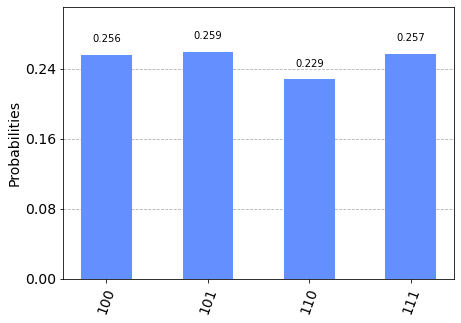

In [11]:
plot_histogram(result.get_counts(circuit))

In [14]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [16]:
provider = IBMQ.get_provider("ibm-q")
qcomp = provider.get_backend("ibmq_16_melbourne")

In [17]:
job = execute(circuit, backend = qcomp)

In [18]:
from qiskit.tools.monitor import job_monitor

job_monitor(job)

Job Status: job has successfully run


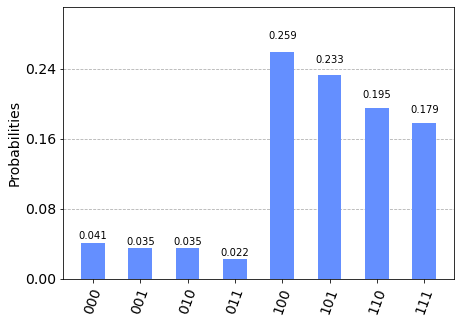

In [19]:
result = job.result()

plot_histogram(result.get_counts(circuit))